<a href="https://colab.research.google.com/github/emiliemagne/QM6/blob/main/Graduation_Rate_Ethnicity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas
import numpy

import matplotlib as plt
%matplotlib inline

graduation_rates_19 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/GRAD_RATE_AND_OUTCOMES_2019.csv')
graduation_rates_20 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/GRAD_RATE_AND_OUTCOMES_2020.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
graduation_rates_19 = graduation_rates_19.loc[graduation_rates_19['aggregation_type'] == 'County']
graduation_rates_19 = graduation_rates_19.loc[graduation_rates_19['membership_desc'] == '2015 Total Cohort - 4 Year Outcome']
graduation_rates_19_White = graduation_rates_19.loc[graduation_rates_19['subgroup_name'] == 'White']
graduation_rates_19_All = graduation_rates_19.loc[graduation_rates_19['subgroup_name'] == 'All Students']
graduation_rates_19_All = graduation_rates_19_All.drop(3605, axis = 0)
graduation_rates_19_White = graduation_rates_19_White.drop(3609, axis = 0)

graduation_rates_19_All_Hamilton = graduation_rates_19_All.loc[graduation_rates_19_All['aggregation_name'] == 'County: HAMILTON']
graduation_rates_19_White_Hamilton = graduation_rates_19_White.loc[graduation_rates_19_White['aggregation_name'] == 'County: HAMILTON']
# LIMITATION: Got rid of Hamilton County because they do not report ethnicity. 

BAME_percentages = []
for x in range(0, len(graduation_rates_19_All['enroll_cnt'])):
  all_students_count = graduation_rates_19_All['enroll_cnt'].astype(float).iloc[x]
  white_students_count = graduation_rates_19_White['enroll_cnt'].astype(float).iloc[x]
  BAME_students = all_students_count - white_students_count 
  BAME_percentage = (BAME_students / all_students_count) * 100
  BAME_percentages.append(BAME_percentage)

graduation_rates_19_All['BAME_percentages'] = BAME_percentages
print("First quartile  : ", numpy.quantile(BAME_percentages, .25))
print("Third quartile  : ", numpy.quantile(BAME_percentages, .75))
counties = pandas.DataFrame(graduation_rates_19_All['aggregation_name'])
counties['BAME_percentages'] = BAME_percentages
BAME_counties = counties
BAME_first_quartile = BAME_counties.loc[BAME_counties['BAME_percentages'].astype(float) <= 7.4]
BAME_first_quartile_19 = BAME_first_quartile
BAME_third_quartile = BAME_counties.loc[BAME_counties['BAME_percentages'].astype(float) >= 35.3]
BAME_third_quartile_19 = BAME_third_quartile
first_quartile_overall_19 = BAME_first_quartile.merge(graduation_rates_19_All, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')
third_quartile_overall_19 = BAME_third_quartile.merge(graduation_rates_19_All, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')


First quartile  :  7.4074074074074066
Third quartile  :  35.30405405405405


In [ ]:
graduation_rates_20 = graduation_rates_20.loc[graduation_rates_20['aggregation_type'] == 'County']
graduation_rates_20 = graduation_rates_20.loc[graduation_rates_20['membership_desc'] == '2016 Total Cohort - 4 Year Outcome']
graduation_rates_20_White = graduation_rates_20.loc[graduation_rates_20['subgroup_name'] == 'White']
graduation_rates_20_All = graduation_rates_20.loc[graduation_rates_20['subgroup_name'] == 'All Students']
#graduation_rates_20_All = graduation_rates_20_All.drop(3605, axis = 0)
#graduation_rates_20_White = graduation_rates_20_White.drop(3609, axis = 0)

#graduation_rates_19_All_Hamilton = graduation_rates_19_All.loc[graduation_rates_19_All['aggregation_name'] == 'County: HAMILTON']
#graduation_rates_19_White_Hamilton = graduation_rates_19_White.loc[graduation_rates_19_White['aggregation_name'] == 'County: HAMILTON']
#LIMITATION: Got rid of Hamilton County because they do not report ethnicity. 

BAME_percentages = []
for x in range(0, len(graduation_rates_20_All['enroll_cnt'])):
  all_students_count = graduation_rates_20_All['enroll_cnt'].astype(float).iloc[x]
  white_students_count = graduation_rates_20_White['enroll_cnt'].astype(float).iloc[x]
  BAME_students = all_students_count - white_students_count 
  BAME_percentage = (BAME_students / all_students_count) * 100
  BAME_percentages.append(BAME_percentage)

graduation_rates_20_All['BAME_percentages'] = BAME_percentages
print("First quartile  : ", numpy.quantile(BAME_percentages, .25))
print("Third quartile  : ", numpy.quantile(BAME_percentages, .75))
counties = pandas.DataFrame(graduation_rates_20_All['aggregation_name'])
counties['BAME_percentages'] = BAME_percentages
BAME_counties = counties
BAME_first_quartile = BAME_counties.loc[BAME_counties['BAME_percentages'].astype(float) <= 7.53]
BAME_first_quartile_20 = BAME_first_quartile
BAME_third_quartile = BAME_counties.loc[BAME_counties['BAME_percentages'].astype(float) >= 34.68]
BAME_third_quartile_20 = BAME_third_quartile
first_quartile_overall_20 = BAME_first_quartile.merge(graduation_rates_20_All, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')
third_quartile_overall_20 = BAME_third_quartile.merge(graduation_rates_20_All, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')
first_quartile_overall_20 = first_quartile_overall_20.drop(6, axis = 0)


First quartile  :  7.530325635703165
Third quartile  :  34.682992700729926


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Low BAME:  1.8
High BAME:  2.4375
Low BAME:  2.0
High BAME:  2.0
Low BAME:  4.443293501768383
High BAME:  1.3647344063956182
Low BAME:  15
High BAME:  16


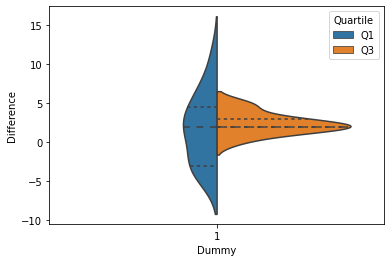

In [ ]:
import seaborn
from statistics import mean
from statistics import median
from statistics import stdev
#first_quartile_2020 - first_quartile_2019
#third_quartile_2020 - third_quartile_2019
first_quartile_overall_20 = first_quartile_overall_20.replace('%', '', regex=True)
first_quartile_overall_19 = first_quartile_overall_19.replace('%', '', regex=True)
difference_Q1 = []
for i in range(0, len(first_quartile_overall_20)):
  difference_Q1_ = first_quartile_overall_20['grad_pct'].astype(float).iloc[i] - first_quartile_overall_19['grad_pct'].astype(float).iloc[i]
  difference_Q1.append(difference_Q1_)

third_quartile_overall_20 = third_quartile_overall_20.replace('%', '', regex=True)
third_quartile_overall_19 = third_quartile_overall_19.replace('%', '', regex=True)
difference_Q3 = []
for i in range(0, len(third_quartile_overall_20)):
  difference_Q3_ = third_quartile_overall_20['grad_pct'].astype(float).iloc[i] - third_quartile_overall_19['grad_pct'].astype(float).iloc[i]
  difference_Q3.append(difference_Q3_)

Q1 = []
for i in range(0, len(difference_Q1)):
  Q1.append('Q1')

Q3 = []
for i in range(0, len(difference_Q3)):
  Q3.append('Q3')

difference_Q1_df = pandas.DataFrame()
difference_Q1_df.insert(0, "Difference", difference_Q1, True)
difference_Q3_df = pandas.DataFrame()
difference_Q3_df.insert(0, "Difference", difference_Q3, True)

difference_Q1_df.insert(0, "Quartile", Q1, True)
difference_Q3_df.insert(0, "Quartile", Q3, True)

comparison = pandas.concat([difference_Q1_df, difference_Q3_df])
comparison['Dummy'] = [1]*len(comparison.index)

seaborn.violinplot(data=comparison, x = 'Dummy', y= 'Difference', hue = 'Quartile', split=True, inner='quartile')

print('Low BAME: ', mean(difference_Q1))
print('High BAME: ', mean(difference_Q3))
print('Low BAME: ', median(difference_Q1))
print('High BAME: ', median(difference_Q3))
print('Low BAME: ', stdev(difference_Q1))
print('High BAME: ', stdev(difference_Q3))
print('Low BAME: ', len(difference_Q1))
print('High BAME: ', len(difference_Q3))
#problem: low sample size


In [ ]:
from scipy import stats
stats.ttest_ind(difference_Q1, difference_Q3)
#t-score = -0.55; p-value = 0.59; thus, these samples differ very little and are likely to be from the same population.
g = 0
t = 0
for x in difference_Q1:
  for y in difference_Q3:
    if x > y:
      g+=1
    t+=1
cles = g/t
print(f"The CLES is: {cles}")

The CLES is: 0.39166666666666666


In [ ]:
#compare Low income/low BAME and low income/high BAME
data_19 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/Data_NY_19.csv')
data_20 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/Data_NY_20.csv')
income_data = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/NY_County_Income.csv')
print("First quartile  : ", numpy.quantile(income_data['Median household income (in 2019 dollars), 2015-2019'], .25))
print("Third quartile  : ", numpy.quantile(income_data['Median household income (in 2019 dollars), 2015-2019'], .75))
income_first_quartile = income_data.loc[income_data['Median household income (in 2019 dollars), 2015-2019'] <= 54152]
income_third_quartile = income_data.loc[income_data['Median household income (in 2019 dollars), 2015-2019'] >= 65360]

low_income_counties = income_first_quartile['COUNTY']
high_income_counties = income_third_quartile['COUNTY']

low_income_counties_df = pandas.DataFrame()
low_income_counties_df.insert(0, "Low Income Counties", low_income_counties, True)

high_income_counties_df = pandas.DataFrame()
high_income_counties_df.insert(0, "High Income Counties", high_income_counties, True)

low_income_counties_df



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First quartile  :  54152.0
Third quartile  :  65360.25


,Low Income Counties
1,Allegany
2,Bronx
3,Broome
4,Cattaraugus
6,Chautauqua
8,Chenango
12,Delaware
16,Franklin
17,Fulton
19,Greene


In [ ]:
BAME_third_quartile_NY = BAME_third_quartile_19 #Because BAME_third_quartile_19 and BAME_third_quartile_20 are the same
BAME_third_quartile_NY = BAME_third_quartile_NY.replace("County: ", "", regex = True)
BAME_third_quartile_NY = BAME_third_quartile_NY.replace(" ", "", regex = True)
lower_case_counties = BAME_third_quartile_NY["aggregation_name"].str.lower()
BAME_third_quartile_NY.insert(2, "County", lower_case_counties, True)
BAME_third_quartile_NY = BAME_third_quartile_NY.drop("aggregation_name", axis = 1)
BAME_third_quartile_NY = BAME_third_quartile_NY.drop("BAME_percentages", axis = 1)

lower_case_counties = low_income_counties_df["Low Income Counties"].str.lower()
low_income_counties_df.insert(1, "County", lower_case_counties, True)
low_income_counties_df = low_income_counties_df.drop("Low Income Counties", axis = 1)
low_income_counties_df = low_income_counties_df.replace(u"\xa0", "", regex = True)



In [ ]:
low_income_high_BAME = []
for x in low_income_counties_df['County']:
  for y in BAME_third_quartile_NY['County']:
    if x == y:
      low_income_high_BAME.append(x)
d = {'County': low_income_high_BAME}
low_income_high_BAME_df = pandas.DataFrame(data = d)
low_income_high_BAME_df



,County
0,bronx


In [ ]:
BAME_first_quartile_19 = BAME_first_quartile_19.replace("County: ", "", regex = True)
BAME_first_quartile_19 = BAME_first_quartile_19.replace(" ", "", regex = True)
lower_case_counties = BAME_first_quartile_19["aggregation_name"].str.lower()
BAME_first_quartile_19.insert(2, "County", lower_case_counties, True)
BAME_first_quartile_19 = BAME_first_quartile_19.drop("aggregation_name", axis = 1)
BAME_first_quartile_19 = BAME_first_quartile_19.drop("BAME_percentages", axis = 1)

BAME_first_quartile_20 = BAME_first_quartile_20.replace("County: ", "", regex = True)
BAME_first_quartile_20 = BAME_first_quartile_20.replace(" ", "", regex = True)
lower_case_counties = BAME_first_quartile_20["aggregation_name"].str.lower()
BAME_first_quartile_20.insert(2, "County", lower_case_counties, True)
BAME_first_quartile_20 = BAME_first_quartile_20.drop("aggregation_name", axis = 1)
BAME_first_quartile_20 = BAME_first_quartile_20.drop("BAME_percentages", axis = 1)


In [ ]:
low_income_low_BAME_19 = []
for x in low_income_counties_df['County']:
  for y in BAME_first_quartile_19['County']:
    if x == y:
      low_income_low_BAME_19.append(x)
d = {'County': low_income_low_BAME_19}
low_income_low_BAME_19_df = pandas.DataFrame(data = d)


low_income_low_BAME_20 = []
for x in low_income_counties_df['County']:
  for y in BAME_first_quartile_20['County']:
    if x == y:
      low_income_low_BAME_20.append(x)
d = {'County': low_income_low_BAME_20}
low_income_low_BAME_20_df = pandas.DataFrame(data = d)


In [ ]:
low_income_low_BAME_19_df

,County
0,allegany
1,chenango
2,steuben


In [ ]:
low_income_low_BAME_20_df

,County
0,allegany
1,chenango
2,delaware
3,fulton


In [ ]:
low_income_low_BAME_counties = low_income_low_BAME_19_df.merge(low_income_low_BAME_20_df, left_on = 'County', right_on = 'County', how = 'outer')
low_income_low_BAME_counties

,County
0,allegany
1,chenango
2,steuben
3,delaware
4,fulton


So Allegany and Chenango are the same in both but Steuben is not in that list anymore the next year. But, on the other hand, Delaware and Fulton are now in the low_income_low_BAME list. Now, this can only be due to slight changes in BAME students in these counties. I will check how drastic they were. If they were not very drastic, I will include all of them in the analysis so I take the difference between the graduation rates for all of them. 

In [ ]:
steuben_19 = graduation_rates_19_All.loc[graduation_rates_19_All['county_name'] == 'STEUBEN']
steuben_20 = graduation_rates_20_All.loc[graduation_rates_20_All['county_name'] == 'STEUBEN']
#BAME percentage Steuden 2019: 7.37%
#BAME percentage Steuden 2020: 7.77%
#Not a large increase for Steuben but just enough to get it into second quartile
delaware_19 = graduation_rates_19_All.loc[graduation_rates_19_All['county_name'] == 'DELAWARE']
delaware_20 = graduation_rates_20_All.loc[graduation_rates_20_All['county_name'] == 'DELAWARE']
#BAME percentage Delaware 2019: 8.08%
#BAME percentage Delaware 2020: 5.81%
#Strong decrease in BAME students in Delaware schools; though not unusual since we are taking only two cohorts of ca 400 students so such a 
#variance is to be expected. 8% is still a low BAME percentage so we will take Delaware into account, too. 
fulton_19 = graduation_rates_19_All.loc[graduation_rates_19_All['county_name'] == 'FULTON']
fulton_20 = graduation_rates_20_All.loc[graduation_rates_20_All['county_name'] == 'FULTON']
#BAME percentage Fulton 2019: 10.80%
#BAME percentage Fulton 2020: 6.51%
#again, such variance is to be expected as we are talking about a cohort of around 615 students in both years so the ethnic distribution may vary significantly by cohort.
#So, Fulton will also be considered as 10.80% is also quite low. 


In [ ]:
graduation_rates_19 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/GRAD_RATE_AND_OUTCOMES_2019.csv')
graduation_rates_20 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/GRAD_RATE_AND_OUTCOMES_2020.csv')
graduation_rates_19 = graduation_rates_19.loc[graduation_rates_19['aggregation_type'] == 'District']
graduation_rates_19 = graduation_rates_19.loc[graduation_rates_19['membership_desc'] == '2015 Total Cohort - 4 Year Outcome']
graduation_rates_19 = graduation_rates_19.loc[graduation_rates_19['subgroup_name'] == 'All Students']

graduation_rates_20 = graduation_rates_20.loc[graduation_rates_20['aggregation_type'] == 'District']
graduation_rates_20 = graduation_rates_20.loc[graduation_rates_20['membership_desc'] == '2016 Total Cohort - 4 Year Outcome']
graduation_rates_20 = graduation_rates_20.loc[graduation_rates_20['subgroup_name'] == 'All Students']

graduation_rates_19_bronx = graduation_rates_19.loc[graduation_rates_19['county_name'] == 'BRONX']
graduation_rates_20_bronx = graduation_rates_20.loc[graduation_rates_20['county_name'] == 'BRONX']

graduation_rates_19_low_income_high_BAME = graduation_rates_19_bronx
graduation_rates_20_low_income_high_BAME = graduation_rates_20_bronx









/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
low_income_low_BAME_19_ = pandas.DataFrame()
for x in low_income_low_BAME_counties['County']:
  z = graduation_rates_19.loc[graduation_rates_19['county_name'] == x.upper()]
  low_income_low_BAME_19_ = low_income_low_BAME_19_.append(z)

low_income_low_BAME_20_ = pandas.DataFrame()
for x in low_income_low_BAME_counties['County']:
  z = graduation_rates_20.loc[graduation_rates_20['county_name'] == x.upper()]
  low_income_low_BAME_20_ = low_income_low_BAME_20_.append(z)
low_income_low_BAME_20_ 

low_income_low_BAME_20_ = low_income_low_BAME_20_.replace("%", "", regex = True)
low_income_low_BAME_19_ = low_income_low_BAME_19_.replace("%", "", regex = True)
difference_low_income_low_BAME_ = numpy.subtract(low_income_low_BAME_20_['grad_pct'].values.astype(float), low_income_low_BAME_19_['grad_pct'].values.astype(float))

low_income_high_BAME_19_ = graduation_rates_19_low_income_high_BAME.replace('%', "", regex = True)
low_income_high_BAME_20_ = graduation_rates_20_low_income_high_BAME.replace('%', "", regex = True)
difference_low_income_high_BAME_ = numpy.subtract(low_income_high_BAME_20_['grad_pct'].values.astype(float), low_income_high_BAME_19_['grad_pct'].values.astype(float))




INSANE OUTLIER: GEORGETOWN-SOUTH OTSELIC CENTRAL SCHOOL DISTRICT HAS 4% grad rate in 2019 and 94% grad rate in 2020. This seems like a mistake even considering the cohorts were only around 30 students both years. Thus, this school district will not be considered in the analysis. 

In [ ]:
difference_low_income_low_BAME_ = numpy.concatenate((difference_low_income_low_BAME_[:17],difference_low_income_low_BAME_[18:]), axis = 0)


Ttest_indResult(statistic=-0.9643865947708979, pvalue=0.3392319634943083)
49
6
Low BAME:  2.4489795918367347
High BAME:  5.5
Low BAME:  2.0
High BAME:  5.5
Low BAME:  7.670455289860016
High BAME:  1.51657508881031
The CLES is: 0.3163265306122449


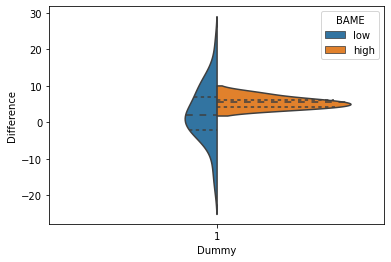

In [ ]:
print(stats.ttest_ind(difference_low_income_low_BAME_, difference_low_income_high_BAME_))

low_BAME = []
high_BAME = []
for x in range(0, len(difference_low_income_low_BAME_)):
  low_BAME.append('low')
for x in range(0, len(difference_low_income_high_BAME_)):
  high_BAME.append('high')

difference_low_income_low_BAME_df = pandas.DataFrame()
difference_low_income_high_BAME_df = pandas.DataFrame()
difference_low_income_low_BAME_df.insert(0, 'Difference', difference_low_income_low_BAME_, True)
difference_low_income_low_BAME_df.insert(1, 'BAME', low_BAME, True)
difference_low_income_high_BAME_df.insert(0, 'Difference', difference_low_income_high_BAME_, True)
difference_low_income_high_BAME_df.insert(1, 'BAME', high_BAME, True)

difference_total = difference_low_income_low_BAME_df.append(difference_low_income_high_BAME_df)
difference_total['Dummy'] = [1]*len(difference_total.index)

seaborn.violinplot(data=difference_total, x = 'Dummy', y= 'Difference', hue = 'BAME', split=True, inner='quartile')
print(len(difference_low_income_low_BAME_))
print(len(difference_low_income_high_BAME_))
print('Low BAME: ', mean(difference_low_income_low_BAME_))
print('High BAME: ', mean(difference_low_income_high_BAME_))
print('Low BAME: ', median(difference_low_income_low_BAME_))
print('High BAME: ', median(difference_low_income_high_BAME_))
print('Low BAME: ', stdev(difference_low_income_low_BAME_))
print('High BAME: ', stdev(difference_low_income_high_BAME_))
g = 0
t = 0
for x in difference_low_income_low_BAME_:
  for y in difference_low_income_high_BAME_:
    if x > y:
      g+=1
    t+=1
cles = g/t
print(f"The CLES is: {cles}") 



Analysis BAME compared to White

In [ ]:
graduation_rates_19 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/GRAD_RATE_AND_OUTCOMES_2019.csv')
graduation_rates_20 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/GRAD_RATE_AND_OUTCOMES_2020.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
graduation_rates_19 = graduation_rates_19.loc[graduation_rates_19['aggregation_type'] == 'County']
graduation_rates_19 = graduation_rates_19.loc[graduation_rates_19['membership_desc'] == '2015 Total Cohort - 4 Year Outcome']
graduation_rates_19_White = graduation_rates_19.loc[graduation_rates_19['subgroup_name'] == 'White']

graduation_rates_19_BAME = graduation_rates_19
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'White']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Female']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Male']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'All Students']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'General Education Students']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Students with Disabilities']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Not English Language Learner']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'English Language Learner']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Formerly English Language Learner']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Economically Disadvantaged']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Not Economically Disadvantaged']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Migrant']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Not Migrant']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Homeless']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Not Homeless']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'In Foster Care']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Not in Foster Care']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Parent in Armed Forces']
graduation_rates_19_BAME = graduation_rates_19_BAME[graduation_rates_19_BAME['subgroup_name'] != 'Parent Not in Armed Forces']


graduation_rates_20 = graduation_rates_20.loc[graduation_rates_20['aggregation_type'] == 'County']
graduation_rates_20 = graduation_rates_20.loc[graduation_rates_20['membership_desc'] == '2016 Total Cohort - 4 Year Outcome']
graduation_rates_20_White = graduation_rates_20.loc[graduation_rates_20['subgroup_name'] == 'White']

graduation_rates_20_BAME = graduation_rates_20
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'White']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Female']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Male']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'All Students']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'General Education Students']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Students with Disabilities']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Not English Language Learner']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'English Language Learner']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Formerly English Language Learner']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Economically Disadvantaged']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Not Economically Disadvantaged']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Migrant']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Not Migrant']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Homeless']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Not Homeless']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'In Foster Care']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Not in Foster Care']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Parent in Armed Forces']
graduation_rates_20_BAME = graduation_rates_20_BAME[graduation_rates_20_BAME['subgroup_name'] != 'Parent Not in Armed Forces']

graduation_rates_19_White.to_csv('graduation_rates_19_White.csv')
graduation_rates_20_White.to_csv('graduation_rates_20_White.csv')






Difference calculation

In [ ]:
import statistics

grad_rate_BAME_2019 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/Grad_rate_BAME_2019.csv')
grad_rate_BAME_2020 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/Grad_rate_BAME_2020.csv')
grad_rate_White_2019 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/Grad_rate_White_2019.csv')
grad_rate_White_2020 = pandas.read_csv('./drive/MyDrive/Johann/UCL/Second Year/Quantitative Methods 2/FinalProject/Grad_rate_White_2020.csv')

grad_rate_BAME_2019 = grad_rate_BAME_2019.replace('%', '', regex=True)
grad_rate_BAME_2020 = grad_rate_BAME_2020.replace('%', '', regex=True)
grad_rate_White_2019 = grad_rate_White_2019.replace('%', '', regex=True)
grad_rate_White_2020 = grad_rate_White_2020.replace('%', '', regex=True)

grad_rate_BAME_2019 = grad_rate_BAME_2019.loc[grad_rate_BAME_2019['county_name'] != 'SCHUYLER']
grad_rate_BAME_2019 = grad_rate_BAME_2019.loc[grad_rate_BAME_2019['county_name'] != 'ESSEX']

grad_rate_BAME_2019 = grad_rate_BAME_2019[:277]
grad_rates_White_diff = []
for x in range(0, len(grad_rate_White_2020['grad_pct'])):
  if grad_rate_White_2020['grad_pct'].values[x] != '-' and grad_rate_White_2019['grad_pct'].values[x] != '-':
    diff = float(grad_rate_White_2020['grad_pct'].values[x]) - float(grad_rate_White_2019['grad_pct'].values[x])
    grad_rates_White_diff.append(diff)

'''common_grad_rate_BAME_2019 = []
x = 0
while x < len(grad_rate_BAME_2019['grad_pct']):
  am = 'n'
  bl = 'n'
  his = 'n'
  asi = 'n'
  mult = 'n'
  second = False
  third = False
  fourth = False
  fifth = False
  cohort = []
  current_county = grad_rate_BAME_2019['county_name'].iloc[x]

  if x < len(grad_rate_BAME_2019['grad_pct']):
    am = grad_rate_BAME_2019['grad_pct'].iloc[x]
    if am != '-' and am != 'n' and grad_rate_BAME_2019['county_name'].iloc[x] == current_county:
      cohort.append(float(am))
  if x + 1 < len(grad_rate_BAME_2019['grad_pct']):
    bl = grad_rate_BAME_2019['grad_pct'].iloc[x+ 1]
    if bl != '-' and bl != 'n' and grad_rate_BAME_2019['county_name'].iloc[x + 1] == current_county:
      cohort.append(float(bl))
    if grad_rate_BAME_2019['county_name'].iloc[x + 1] != current_county:
      second = True
  if x + 2 < len(grad_rate_BAME_2019['grad_pct']):
    his = grad_rate_BAME_2019['grad_pct'].iloc[x+ 2]
    if his != '-' and his != 'n' and grad_rate_BAME_2019['county_name'].iloc[x + 2] == current_county:
      cohort.append(float(his))
    if grad_rate_BAME_2019['county_name'].iloc[x + 2] != current_county:
      third = True
  if x + 3 < len(grad_rate_BAME_2019['grad_pct']):
    asi = grad_rate_BAME_2019['grad_pct'].iloc[x+ 3]
    if asi != '-' and asi != 'n' and grad_rate_BAME_2019['county_name'].iloc[x + 3] == current_county:
      cohort.append(float(asi))
    if grad_rate_BAME_2019['county_name'].iloc[x + 3] != current_county:
      fourth = True
  if x + 4 < len(grad_rate_BAME_2019['grad_pct']):
    mult = grad_rate_BAME_2019['grad_pct'].iloc[x+ 4]
    if mult != '-' and mult != 'n' and grad_rate_BAME_2019['county_name'].iloc[x + 4] == current_county:
      cohort.append(float(mult))
    if grad_rate_BAME_2019['county_name'].iloc[x + 4] != current_county:
      fifth = True
  
  if len(cohort) > 0: 
    average = statistics.mean(cohort)
    common_grad_rate_BAME_2019.append(average)

  if second == True:
    x = x + 1
    continue

  elif third == True:
    x = x + 2
    continue

  elif fourth == True:
    x = x + 3
    continue

  elif fifth == True:
    x = x + 4
    continue
  x = x + 5

print(len(common_grad_rate_BAME_2019))'''
grad_rate_BAME_2020

,county_name,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct
0,ALBANY,2016 Total Cohort - 4 Year Outcome,American Indian/Alaska Native,8,5,63
1,ALBANY,2016 Total Cohort - 4 Year Outcome,Black,660,502,76
2,ALBANY,2016 Total Cohort - 4 Year Outcome,Hispanic,247,191,77
3,ALBANY,2016 Total Cohort - 4 Year Outcome,Asian/Pacific Islander,285,263,92
4,ALBANY,2016 Total Cohort - 4 Year Outcome,Multiracial,103,84,82
...,...,...,...,...,...,...
281,WESTCHESTER,2016 Total Cohort - 4 Year Outcome,Multiracial,206,194,94
282,WYOMING,2016 Total Cohort - 4 Year Outcome,Black,1,-,-
283,WYOMING,2016 Total Cohort - 4 Year Outcome,Hispanic,8,7,88
284,WYOMING,2016 Total Cohort - 4 Year Outcome,Asian/Pacific Islander,5,3,60


In [ ]:
import statistics
common_grad_rate_BAME_2019 = []
x = 0
while x < len(grad_rate_BAME_2019['grad_pct']):
  county_avg = pandas.DataFrame()
  county_avg['aggregation_name'] = []
  county_avg['enroll_cnt'] = [0]
  county_avg['grad_cnt'] = [0]
  county_avg.aggregation_name[0] = current_county
  current_county = grad_rate_BAME_2019['county_name'].iloc[x]
  while grad_rate_BAME_2019['county_name'].iloc[x] == current_county:
    if grad_rate_BAME_2019['enroll_cnt'].values[x] != '-' and grad_rate_BAME_2019['grad_cnt'].values[x] != '-':
      county_avg.enroll_cnt[0] = int(county_avg['enroll_cnt'].values[0]) + int(grad_rate_BAME_2019['enroll_cnt'].values[x])
    if grad_rate_BAME_2019['grad_cnt'].values[x] != '-' and grad_rate_BAME_2019['enroll_cnt'].values[x] != '-':  
      county_avg.grad_cnt[0] = int(county_avg['grad_cnt'].values[0]) + int(grad_rate_BAME_2019['grad_cnt'].values[x])
    x += 1
    if x >= len(grad_rate_BAME_2019['grad_pct']) and county_avg['enroll_cnt'].values[0] > 0 and int(county_avg['grad_cnt'].values[0]) > 0:
      avg = (int(county_avg['grad_cnt'].values[0])/int(county_avg['enroll_cnt'].values[0]))*100 
      common_grad_rate_BAME_2019.append(avg)
      break
    if grad_rate_BAME_2019['county_name'].iloc[x] != current_county and county_avg['enroll_cnt'].values[0] > 0 and int(county_avg['grad_cnt'].values[0]) > 0:
      avg = (int(county_avg['grad_cnt'].values[0])/int(county_avg['enroll_cnt'].values[0]))*100
      common_grad_rate_BAME_2019.append(avg)
      
print(common_grad_rate_BAME_2019)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/pyt

[74.01129943502825, 72.0, 72.28682170542635, 72.2972972972973, 66.33663366336634, 66.15384615384615, 60.0, 67.56756756756756, 78.57142857142857, 73.52941176470588, 76.0, 73.07692307692307, 74.69982847341338, 69.46242611877287, 83.11688311688312, 61.29032258064516, 77.61194029850746, 79.51807228915662, 82.75862068965517, 81.56424581005587, 100.0, 79.59183673469387, 78.18181818181819, 70.76365663322186, 59.42857142857143, 84.9326805385557, 73.03996657847097, 66.5391446918978, 72.00576430401367, 76.79848909746467, 73.9021329987453, 68.24561403508773, 67.00879765395894, 69.23937360178971, 77.77777777777779, 77.921498661909, 84.375, 74.0, 80.48780487804879, 82.9032258064516, 82.02898550724638, 76.0655737704918, 83.75, 87.85425101214574, 70.97186700767263, 78.57142857142857, 95.23809523809523, 74.4186046511628, 78.4794899554914, 71.1038961038961, 70.58823529411765, 81.67938931297711, 77.62237762237763, 72.5, 82.97872340425532, 81.875, 81.4261744966443, 90.0]


In [ ]:
#Schuyler and Essex are not present in the 2020 data

In [ ]:
import statistics
common_grad_rate_BAME_2020 = []
x = 0
while x < len(grad_rate_BAME_2020['grad_pct']):
  county_avg = pandas.DataFrame()
  county_avg['aggregation_name'] = []
  county_avg['enroll_cnt'] = [0]
  county_avg['grad_cnt'] = [0]
  county_avg.aggregation_name[0] = current_county
  current_county = grad_rate_BAME_2020['county_name'].iloc[x]
  while grad_rate_BAME_2020['county_name'].iloc[x] == current_county:
    if grad_rate_BAME_2020['enroll_cnt'].values[x] != '-' and grad_rate_BAME_2020['grad_cnt'].values[x] != '-':
      county_avg.enroll_cnt[0] = int(county_avg['enroll_cnt'].values[0]) + int(grad_rate_BAME_2020['enroll_cnt'].values[x])
    if grad_rate_BAME_2020['grad_cnt'].values[x] != '-' and grad_rate_BAME_2020['enroll_cnt'].values[x] != '-':  
      county_avg.grad_cnt[0] = int(county_avg['grad_cnt'].values[0]) + int(grad_rate_BAME_2020['grad_cnt'].values[x])
    x += 1
    if x >= len(grad_rate_BAME_2020['grad_pct']) and county_avg['enroll_cnt'].values[0] > 0 and int(county_avg['grad_cnt'].values[0]) > 0:
      avg = (int(county_avg['grad_cnt'].values[0])/int(county_avg['enroll_cnt'].values[0]))*100 
      common_grad_rate_BAME_2020.append(avg)
      break
    if grad_rate_BAME_2020['county_name'].iloc[x] != current_county and county_avg['enroll_cnt'].values[0] > 0 and int(county_avg['grad_cnt'].values[0]) > 0:
      avg = (int(county_avg['grad_cnt'].values[0])/int(county_avg['enroll_cnt'].values[0]))*100
      common_grad_rate_BAME_2020.append(avg)
      
print(common_grad_rate_BAME_2020)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/pyt

[80.19953952417498, 80.95238095238095, 79.12524850894633, 80.0, 65.68627450980392, 72.67441860465115, 63.84615384615384, 92.3076923076923, 80.0, 81.65137614678899, 77.5, 82.35294117647058, 78.94280762564992, 80.9699376063528, 78.94736842105263, 68.57142857142857, 83.52941176470588, 86.74698795180723, 81.81818181818183, 84.50704225352112, 83.33333333333334, 90.9090909090909, 77.27272727272727, 78.40726884019242, 77.18120805369128, 87.52160387141376, 76.00746020115899, 71.38802353755625, 74.96842105263158, 79.90274599542334, 75.75057736720554, 72.39057239057239, 70.0, 73.87543252595155, 84.15841584158416, 81.28161888701517, 84.54545454545455, 71.62162162162163, 82.35294117647058, 85.0, 81.73913043478261, 77.52808988764045, 73.5632183908046, 89.0728476821192, 75.91240875912408, 100.0, 96.29629629629629, 84.72222222222221, 81.77634606534745, 76.5625, 86.66666666666667, 74.26470588235294, 84.44055944055944, 70.58823529411765, 69.38775510204081, 81.75675675675676, 83.52053915275995, 76.92307

In [ ]:
'''common_grad_rate_BAME_2020 = []
x = 0
while x < len(grad_rate_BAME_2020['grad_pct']):
  am = 'n'
  bl = 'n'
  his = 'n'
  asi = 'n'
  mult = 'n'
  second = False
  third = False
  fourth = False
  fifth = False
  cohort = []
  current_county = grad_rate_BAME_2020['county_name'].iloc[x]

  if x < len(grad_rate_BAME_2020['grad_pct']):
    am = grad_rate_BAME_2020['grad_pct'].iloc[x]
    if am != '-' and am != 'n' and grad_rate_BAME_2020['county_name'].iloc[x] == current_county:
      cohort.append(float(am))
  if x + 1 < len(grad_rate_BAME_2020['grad_pct']):
    bl = grad_rate_BAME_2020['grad_pct'].iloc[x+ 1]
    if bl != '-' and bl != 'n' and grad_rate_BAME_2020['county_name'].iloc[x + 1] == current_county:
      cohort.append(float(bl))
    if grad_rate_BAME_2020['county_name'].iloc[x + 1] != current_county:
      second = True
  if x + 2 < len(grad_rate_BAME_2020['grad_pct']):
    his = grad_rate_BAME_2020['grad_pct'].iloc[x+ 2]
    if his != '-' and his != 'n' and grad_rate_BAME_2020['county_name'].iloc[x + 2] == current_county:
      cohort.append(float(his))
    if grad_rate_BAME_2020['county_name'].iloc[x + 2] != current_county:
      third = True
  if x + 3 < len(grad_rate_BAME_2020['grad_pct']):
    asi = grad_rate_BAME_2020['grad_pct'].iloc[x+ 3]
    if asi != '-' and asi != 'n' and grad_rate_BAME_2020['county_name'].iloc[x + 3] == current_county:
      cohort.append(float(asi))
    if grad_rate_BAME_2020['county_name'].iloc[x + 3] != current_county:
      fourth = True
  if x + 4 < len(grad_rate_BAME_2020['grad_pct']):
    mult = grad_rate_BAME_2020['grad_pct'].iloc[x+ 4]
    if mult != '-' and mult != 'n' and grad_rate_BAME_2020['county_name'].iloc[x + 4] == current_county:
      cohort.append(float(mult))
    if grad_rate_BAME_2020['county_name'].iloc[x + 4] != current_county:
      fifth = True
  
  if len(cohort) > 0: 
    average = statistics.mean(cohort)
    common_grad_rate_BAME_2020.append(average)

  if second == True:
    x = x + 1
    continue

  elif third == True:
    x = x + 2
    continue

  elif fourth == True:
    x = x + 3
    continue

  elif fifth == True:
    x = x + 4
    continue
  x = x + 5'''

grad_rates_BAME_diff = []
for x in range(0, len(common_grad_rate_BAME_2020)):
  diff = common_grad_rate_BAME_2020[x] - common_grad_rate_BAME_2019[x]
  grad_rates_BAME_diff.append(diff)
print(grad_rates_BAME_diff)

[6.188240089146731, 8.952380952380949, 6.83842680351998, 7.702702702702695, -0.6503591535624196, 6.520572450805005, 3.8461538461538396, 24.74012474012474, 1.4285714285714306, 8.121964382083107, 1.5, 9.276018099547514, 4.242979152236543, 11.507511487579933, -4.169514695830486, 7.281105990783409, 5.917471466198421, 7.228915662650607, -0.9404388714733471, 2.942796443465255, -16.666666666666657, 11.317254174397036, -0.9090909090909207, 7.643612206970559, 17.752636625119848, 2.5889233328580588, 2.967493622688025, 4.848878845658447, 2.962656748617917, 3.1042568979586775, 1.8484443684602354, 4.144958355484661, 2.9912023460410637, 4.636058924161844, 6.380638063806373, 3.360120225106172, 0.17045454545454675, -2.378378378378372, 1.8651362984217883, 2.0967741935483986, -0.28985507246376585, 1.4625161171486525, -10.186781609195407, 1.218596669973465, 4.940541751451448, 21.42857142857143, 1.058201058201064, 10.30361757105942, 3.2968561098560514, 5.458603896103895, 16.07843137254902, -7.414683430624

T-Test

In [ ]:
stats.ttest_ind(grad_rates_White_diff, grad_rates_BAME_diff)

Ttest_indResult(statistic=-1.6447692163706227, pvalue=0.10270161691784391)

Violin Plot

61
58
White:  1.901639344262295
BAME:  3.565004307006328
White:  1.0
BAME:  3.2005565039073645
White:  2.9137885878056133
BAME:  7.312845296574228
The CLES is: 0.36319954776710006


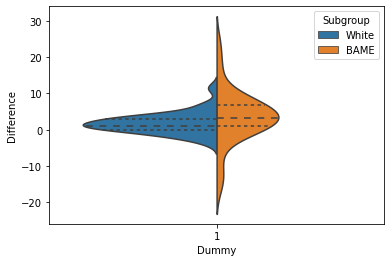

In [ ]:
import matplotlib.pyplot as plt
White = []
BAME = []

for x in range(0, len(grad_rates_White_diff)):
  White.append('White')
for x in range(0, len(grad_rates_BAME_diff)):
  BAME.append('BAME')

grad_rates_White_diff_df = pandas.DataFrame()
grad_rates_BAME_diff_df = pandas.DataFrame()
grad_rates_White_diff_df.insert(0, 'Difference', grad_rates_White_diff, True)
grad_rates_White_diff_df.insert(1, 'Subgroup', White, True)
grad_rates_BAME_diff_df.insert(0, 'Difference', grad_rates_BAME_diff, True)
grad_rates_BAME_diff_df.insert(1, 'Subgroup', BAME, True)

difference_total = grad_rates_White_diff_df.append(grad_rates_BAME_diff_df)
difference_total['Dummy'] = [1]*len(difference_total.index)

seaborn.violinplot(data=difference_total, x = 'Dummy', y= 'Difference', hue = 'Subgroup', split=True, inner='quartile')

print(len(grad_rates_White_diff))
print(len(grad_rates_BAME_diff))
print('White: ', mean(grad_rates_White_diff))
print('BAME: ', mean(grad_rates_BAME_diff))
print('White: ', median(grad_rates_White_diff))
print('BAME: ', median(grad_rates_BAME_diff))
print('White: ', stdev(grad_rates_White_diff))
print('BAME: ', stdev(grad_rates_BAME_diff))
g = 0
t = 0
for x in grad_rates_White_diff:
  for y in grad_rates_BAME_diff:
    if x > y:
      g+=1
    t+=1
cles = g/t
print(f"The CLES is: {cles}")
plt.savefig('AP_Changes.png')